In [1]:
import pandas as pd
import numpy as np

In [12]:
# index_col = 하고 원하는 컬럼명 넣으면 대체됨

movies = pd.read_csv('/content/drive/MyDrive/추천시스템 입문반/DATA/ml-latest-small/movies.csv', index_col='movieId')
movies.head(3)

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


## 장르간에 상관관계 찾기 & 시각화
* 문자열끼리는 상관관계를 찾기 어려울 것! 따라서, 더미코딩 필수
* .corr()를 활용하면 상관계수를 구할 수 있다
* sns.heatmap으로 히트맵 시각화 해볼 수 있다
* 그냥 pandas로도 할 수 있다 (style.background_gradient(cmap='colors')

In [10]:
genres_dummies = movies['genres'].str.get_dummies(sep='|')

In [13]:
 genres_dummies.corr() # but, 이렇게 보면 알아보기 너무 어렵다

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


### Seaborn으로 히트맵 그리기

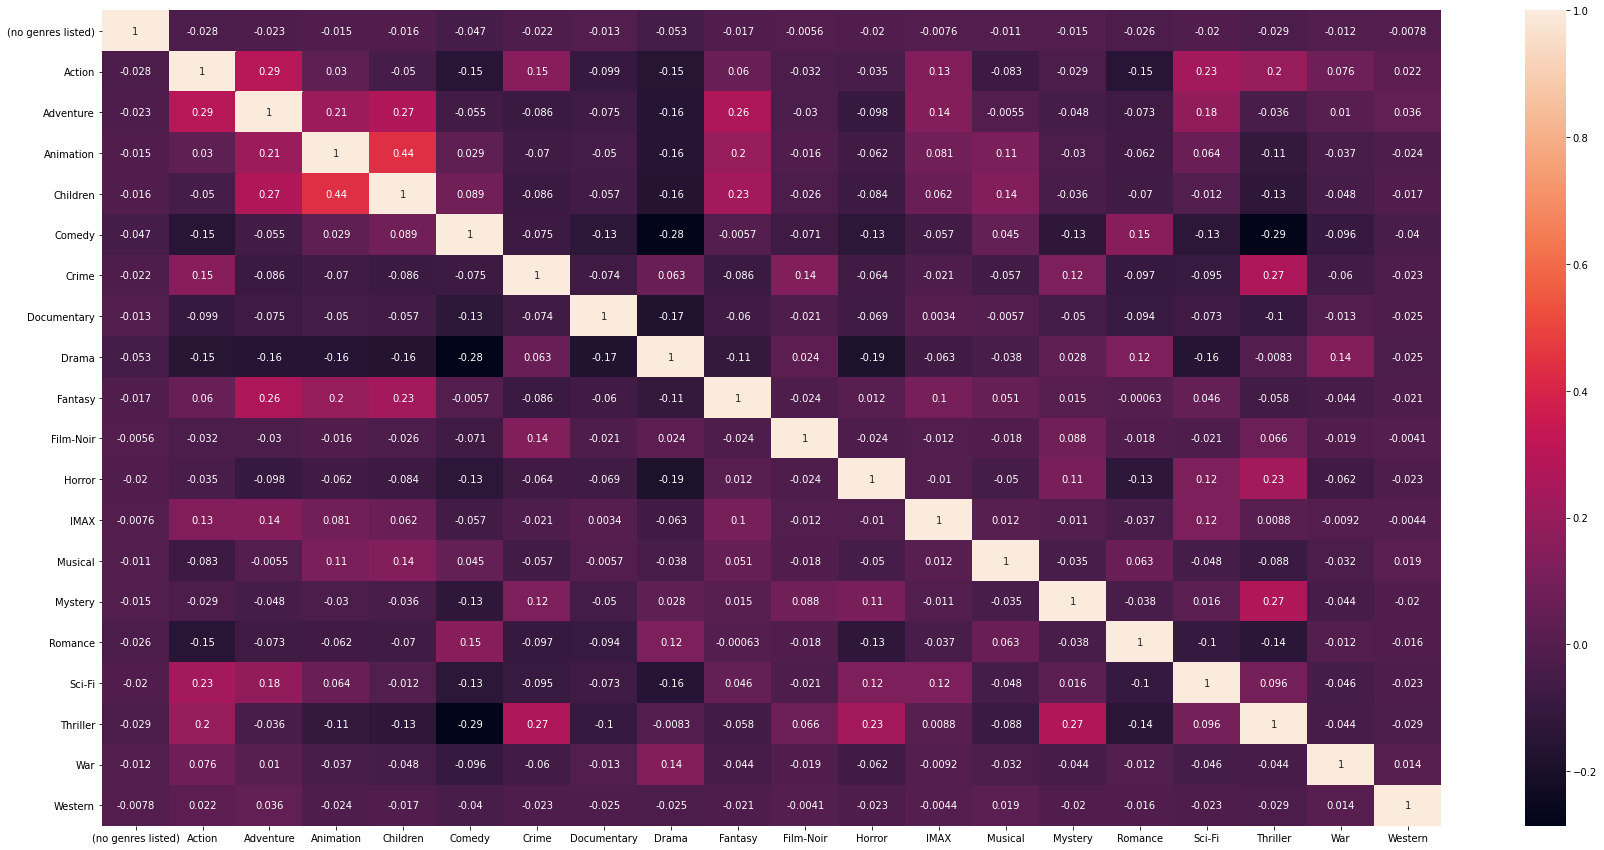

In [15]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
sns.heatmap(genres_dummies.corr(), annot=True)

### style.background_gradient로 히트맵 그리기
* cmap은 컬러코드

In [19]:
genres_dummies.corr().style.background_gradient(cmap='Purples')

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


# 영화 평점 데이터 분석

## 영화 평점 분포 확인하기
* hist()를 활용하면 히스토그램을 그릴 수 있다

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/추천시스템 입문반/DATA/ml-latest-small/ratings.csv')
ratings.sample(3)

,userId,movieId,rating,timestamp
11622,69,296,5.0,1021644176
97244,605,3988,3.0,1277176175
73433,474,1230,4.0,1082256456


In [ ]:
ratings.shape

(100836, 4)

In [ ]:
print(len(ratings['userId'].unique())) # 평가한 사람은 610명
print(len(ratings['movieId'].unique())) # 평가당한 영화는 9724개

610
9724


In [ ]:
ratings['rating'].describe() # 이 평점 데이터는 1부터 시작하는 것이 아닌 0.5부터 시작하는 것을 알 수 있다

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

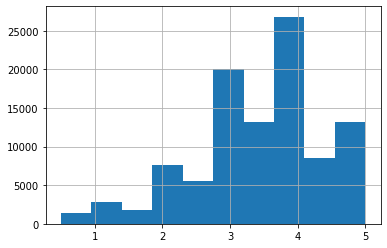

In [ ]:
# sns 안쓰고 판다스 기본으로 시각화

ratings['rating'].hist()

## 인당 평균 평가 영화 개수 구하기
* power law distribution, 멱함수 분포 : 우리가 기존에 생각하는 정규분포가 아닌, 0값에 몰려있는 극단적인 형태의 함수
* dist()는 distribution plot을 그려준다


In [ ]:
# groupby해주고 count해주는 방식으로 구함
movie_per_user = ratings.groupby('userId')['movieId'].count()
movie_per_user.mean()

165.30491803278687

In [ ]:
movie_per_user.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


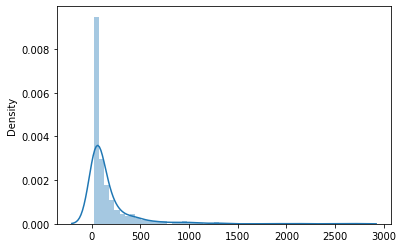

In [ ]:
g = sns.distplot(movie_per_user.values)

## 가장 많이 평가당한 영화 구하기

In [ ]:
films = ratings.groupby('movieId')['userId'].count()
films.describe()

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


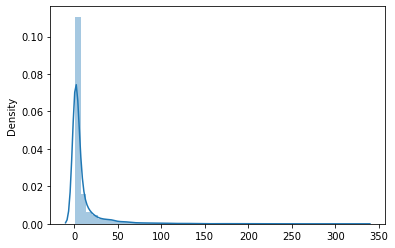

In [ ]:
sns.distplot(films.values)

## 가장 많이 평가당한 영화 이름 찾기
* 굳이 merge 하지 않아도 loc으로 찾을 수 있겠다
* isin으로도 찾을 수 있을까? = 있다. 하지만 주의할 게, movie_id = index이므로 굳이 필요없고, 그냥 ranking이라는 top5 리스트를 만들어서 loc으로 가져와주었다

In [ ]:
films.sort_values(ascending= False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
57502       1
57522       1
57526       1
4032        1
193609      1
Name: userId, Length: 9724, dtype: int64

In [ ]:
movies.loc[[356,318,296,593,2571]]

,title,genres,year
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,1994
318,"Shawshank Redemption, The (1994)",Crime|Drama,1994
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999


In [ ]:
# 위 방법과 똑같지만 순위가 100개를 넘어가거나 해서 손으로 일일히 칠 수 없을 때는 리스트로 만들어서도 가능

ranking = films.sort_values(ascending=False).index
ranking = list(ranking[0:6])
ranking

[356, 318, 296, 593, 2571, 260]

In [ ]:
movies.loc[ranking]

,title,genres,year
movieId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,1994
318,"Shawshank Redemption, The (1994)",Crime|Drama,1994
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,1977


## 겨울왕국 평점보기

In [ ]:
# 겨울왕국의 movieId 찾기 = 2013년도 개봉한 106696번

movies.loc[movies['title'].str.contains('Frozen')]

,title,genres,year
movieId,,,
60943,Frozen River (2008),Drama,2008
75395,Frozen (2010),Drama|Horror|Thriller,2010
100553,Frozen Planet (2011),Documentary,2011
106696,Frozen (2013),Adventure|Animation|Comedy|Fantasy|Musical|Rom...,2013


In [ ]:
# Frozen을 평가한 사람들과 그들의 점수에 대한 데이터를 겨울왕국 movieId를 활용해 불러왔다

frozen = ratings[ratings['movieId'] == 106696]

In [ ]:
len(frozen) # 총 29명이 평가함

29

In [ ]:
frozen.head(3)

,userId,movieId,rating,timestamp
1245,10,106696,4.5,1455306204
3572,21,106696,4.0,1403460685
9418,63,106696,5.0,1443461176


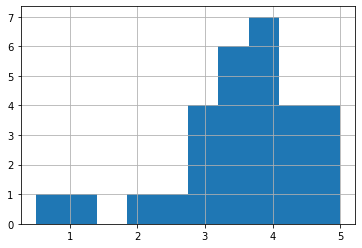

In [ ]:
frozen['rating'].hist() # 대부분은 3~5점 좋은 점수를 줬는데, 엄청 낮은 점수를 준 사람이 보인다

In [ ]:
# 낮은 점수를 준 사람을 찾아서 이 사람이 다른 영화에는 어떻게 평점을 매겼는지 찾아보자
# sort_values로 오름차순해서 유저아이디를 찾아냄

frozen.sort_values(by='rating').head(3)

,userId,movieId,rating,timestamp
88023,567,106696,0.5,1525289874
81910,517,106696,1.0,1487955739
53458,352,106696,2.0,1493674468


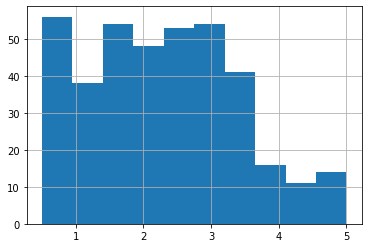

In [ ]:
# 567번 사람은 거의 낮은 점수만 몰아서 주는 시러시러몬인 것을 확인해볼 수 있다

ratings.loc[ratings['userId'] == 567, 'rating'].hist()

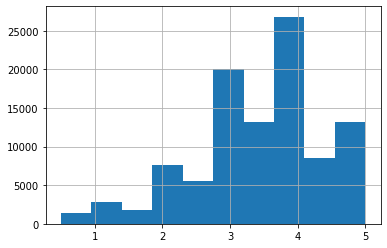

In [ ]:
# 전체 rating 테이블에서 대부분의 유저들의 점수 분포를 봐도 567번 사람이 특이한 것을 볼 수 있음

ratings['rating'].hist()

# 나의 영화 평점 데이터 추가하기

## 타임스탬프 데이터타입 처리하기
* timestamp 데이터가 1525289874 이런식으로 쓰여있는 경우 알아보기 힘들다
* datetime.fromtimestamp(x)로 처리해주면 datetime 형태로 변환할 수 있음

In [ ]:
from datetime import datetime

In [ ]:
ratings['timestamp'] = ratings['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22
100832,610,168248,5.0,2017-05-03 22:21:31
100833,610,168250,5.0,2017-05-08 19:50:47
100834,610,168252,5.0,2017-05-03 21:19:12


## 나와 친구들의 평점 데이터 붙이기

In [ ]:
myratings = pd.read_csv('/content/drive/MyDrive/추천시스템 입문반/DATA/ml-latest-small/my-ratings.csv')
myratings

,userId,movieId,rating,timestamp
0,1000,175303,3.0,2020-12-14 16:04:30
1,1000,109374,4.5,2020-12-14 16:04:30
2,1000,160080,2.0,2020-12-14 16:04:30
3,1000,107406,4.5,2020-12-14 16:04:30
4,1000,73881,5.0,2020-12-14 16:04:30
5,1001,73881,4.0,2020-12-14 16:06:30
6,1002,175303,3.5,2020-12-14 20:37:30
7,1002,109374,3.5,2020-12-14 20:37:30
8,1002,160080,4.5,2020-12-14 20:37:30
9,1002,107406,3.5,2020-12-14 20:37:30


In [ ]:
# timestamp가 object로 저장되어 있기 때문에 to_datetime으로 변경해준다

myratings['timestamp'] = pd.to_datetime(myratings['timestamp'])

In [ ]:
# 기존에 만들어져있던 데이터에 현주, 승혁, 준용의 영화 평점을 더해주었다

ratings_concat = pd.concat([ratings, myratings])
ratings_concat.tail()

,userId,movieId,rating,timestamp
6,1002,175303,3.5,2020-12-14 20:37:30
7,1002,109374,3.5,2020-12-14 20:37:30
8,1002,160080,4.5,2020-12-14 20:37:30
9,1002,107406,3.5,2020-12-14 20:37:30
10,1002,73881,2.5,2020-12-14 20:37:30
